# <span style="color:#F72585">Optimización univariada usando JAX</span>

## <span style="color:#4361EE">Introducción</span> 

En este ejercicio generamos un conjunto de datos que sigue un modelo lineal, pasando por el origen. Los datos son contaminados con un error normal $N(0,2^2)$.

## <span style="color:#4361EE">Carga módulos</span> 

In [2]:
from __future__ import print_function
import jax.numpy as np # autograd para windows
import numpy as onp
import matplotlib.pyplot as plt
from jax import grad,jit
import pandas as pd

## <span style="color:#4361EE">Genera y grafica datos simulados</span> 

In [3]:
# Simulación de los Datos

# Se escoge una semilla
onp.random.seed(22)

# Generación de los datos
x=onp.linspace(-2,2,100)
y=5*x+2*onp.random.normal(0,1,len(x))


#Print Results
#print("x:\n",x,"\n")
#print("y:\n",y)

data=pd.DataFrame({"Mediciones":x,"Observaciones":y})
data

,Mediciones,Observaciones
0,-2.000000,-10.183900
1,-1.959596,-12.724681
2,-1.919192,-7.432376
3,-1.878788,-9.872590
4,-1.838384,-10.174177
...,...,...
95,1.838384,10.930610
96,1.878788,8.960411
97,1.919192,9.630197
98,1.959596,11.177407


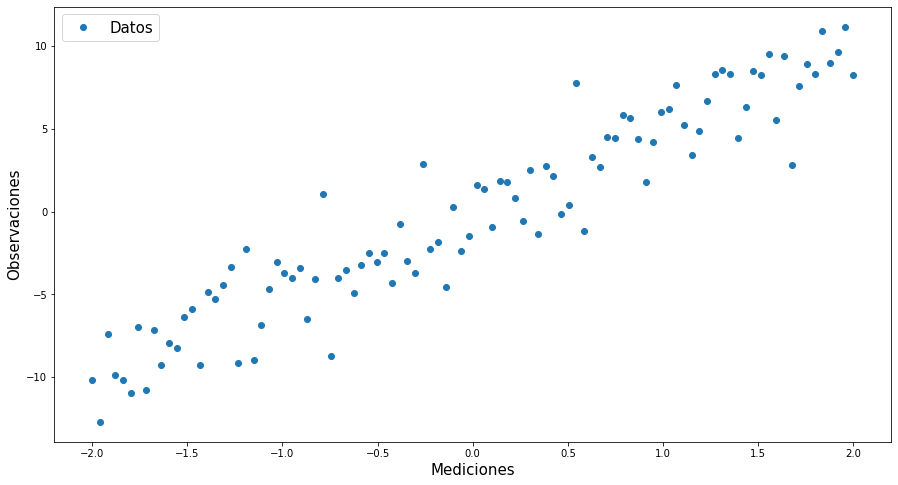

In [4]:
plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos"],fontsize=15)
plt.show()

## <span style="color:#4361EE">Genera y grafica datos simulados con Widgets</span> 

In [5]:
from ipywidgets import interactive
import plotly
import plotly.graph_objs as go

In [6]:
# Simulación de los Datos

def simular_datos(σ=0,w1=0):
    # Se escoge una semilla
    onp.random.seed(22)

    # Generación de los datos
    x=onp.linspace(-2,2,100)
    y=w1*x+onp.random.normal(loc=0,scale=σ,size=len(x))
    data=pd.DataFrame({"Mediciones":x,"Observaciones":y})

    plt.figure(figsize=(10,7))
    plt.plot(x,y,'o',markersize=5)
    plt.xlabel("Mediciones",fontsize=15)
    plt.ylabel("Observaciones",fontsize=15)
    plt.legend(["Datos"],fontsize=15)
    plt.ylim([-30,30])
    plt.title(f'Simulación de ${w1}x+\epsilon$, $\epsilon$ ~ N(0,σ²)')
    plt.show()
    return x,y

interactive_plot = interactive(simular_datos, σ=(0, 10.,0.2),w1 = (-10.,10.))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='σ', max=10.0, step=0.2), FloatSlider(value=0.0, desc…

### <span style="color:#4CC9F0">Ejemplo</span>

Juegue con los sliders para entender a profundidad lo que hace cada parámetro.

## <span style="color:#4361EE">Función de pérdida</span>  

In [7]:
def loss(w1,x,y):
    return ((y-(w1*x))**2).mean()

## Diferenciación Automática
grad_loss=jit(grad(loss,argnums=(0)))

## <span style="color:#4361EE">Gradiente descendiente </span>  

$$\textbf{futuro = presente + paso}\times\textbf{cambio}$$

$$w_{1}^{n+1}=w_{1}^{n}-hL'\big|_{w_{1}^{n}}$$

In [8]:
def optimize(w1,x,y,h=1.5):
    
    # Calcular Derivada
    w1_grad=grad_loss(w1,x,y)
    
    # Gradiente Descendiente
    w1-=h*w1_grad
    
    # Regresar Nuevos parámetros
    return w1

## <span style="color:#4361EE">Optimización</span>  

In [9]:
## Estimación inicial
W1=10.

# Acumular resultados
w1=[]
train_loss=[]
# Número de veces que se cambian los parámetros
epochs=401

# Tasa de Aprendizaje
h=0.01
#0.8

print("Pérdidas:\n")

w1.append(W1)
train_loss.append(loss(W1,x,y))
print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

for epoch in range(epochs):
    
    W1=optimize(W1,x,y,h)
    
    w1.append(W1)
    
    losss=loss(W1,x,y)
    
    train_loss.append(losss)
    
    if epoch%100==0:
        print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")

Pérdidas:

Condición Inicial: Pérdida: 38.407744806265676, Parámetro: 10.0

Iteración 0: Pérdida: 36.55500411987305, Parámetro: 9.86294937133789
Iteración 100: Pérdida: 4.018570423126221, Parámetro: 5.273087501525879
Iteración 200: Pérdida: 3.88777232170105, Parámetro: 4.982072830200195
Iteración 300: Pérdida: 3.887246608734131, Parámetro: 4.963622093200684
Iteración 400: Pérdida: 3.887244701385498, Parámetro: 4.962451457977295


In [10]:
print(w1[-1])

4.9624515


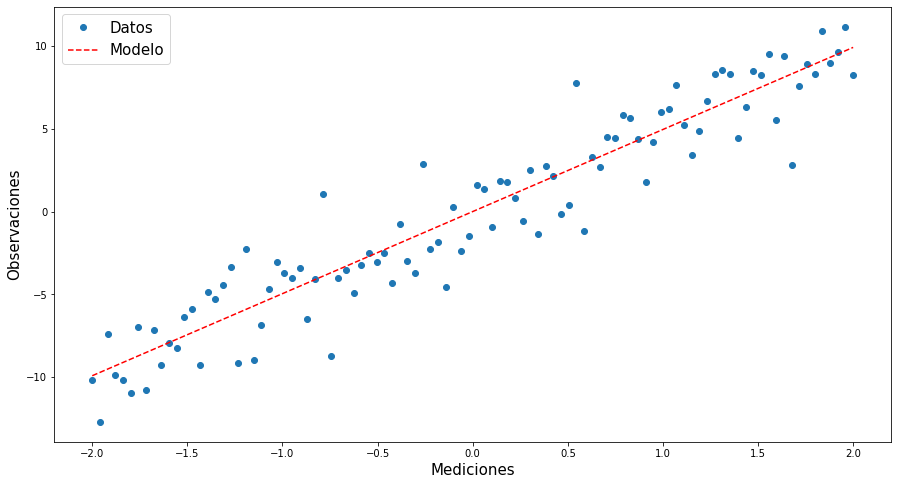

In [11]:
# Haciendo el Mmodelo

mod=w1[-1]*x

# Visualizando el modelo

plt.figure(figsize=(15,8))
plt.plot(x,y,'o')
plt.plot(x,mod,'r--')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos","Modelo"],fontsize=15)
plt.show()

## <span style="color:#4361EE">Usando Widgets</span>  

In [12]:
def regresion(μ=0,σ=0,m=0,epochs=0,W1=0,aprendizaje=0.1):
    # Se escoge una semilla
    onp.random.seed(22)

    # Generación de los datos
    x=onp.linspace(-2,2,100)
    y=m*x+2*onp.random.normal(loc=μ,scale=σ,size=len(x))

    data=pd.DataFrame({"Mediciones":x,"Observaciones":y})

    ## Estimación inicial
    W1=W1

    # Acumular resultados
    w1=[]
    train_loss=[]
    # Número de veces que se cambian los parámetros
    epochs=epochs

    # Tasa de Aprendizaje
    h=aprendizaje
    #0.8

    print("Pérdidas:\n")

    w1.append(W1)
    train_loss.append(loss(W1,x,y))
    print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

    for epoch in range(epochs):

        W1=optimize(W1,x,y,h)

        w1.append(W1)

        losss=loss(W1,x,y)

        train_loss.append(losss)

        if epoch%100==0:
            print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")
        
        # Haciendo el modelo

    mod=w1[-1]*x

    plt.figure(figsize=(15,8))
    plt.plot(x,y,'o')
    plt.plot(x,mod,'r--')
    plt.xlabel("Mediciones",fontsize=15)
    plt.ylabel("Observaciones",fontsize=15)
    plt.legend(["Datos","Modelo"],fontsize=15)
    plt.show()
    

interactive_plot = interactive(regresion, σ=(0, 10.), μ=(-3, 3, 0.5),m = (-10.,10.),epochs=(0,500),W1=(-10.,10.),aprendizaje=(0.0001,1.))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='μ', max=3.0, min=-3.0, step=0.5), FloatSlider(value=…

## <span style="color:#4361EE">Visualizando la función pérdida </span>  

In [13]:
# eje β (par.)
β1x=onp.linspace(-2,11,epochs)

l=onp.empty(len(β1x))

for i in range(len(l)):
    l[i]=((β1x[i]*x-y)**2).mean()

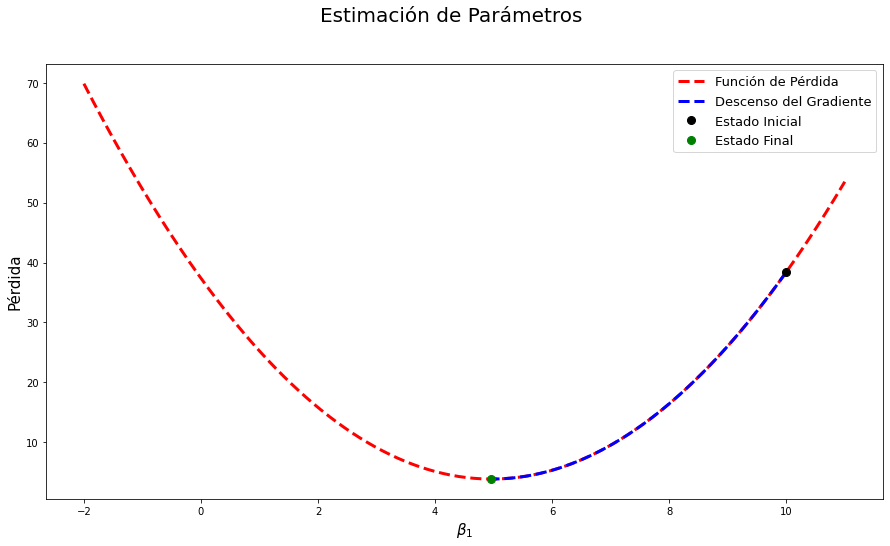

In [14]:
fig = plt.figure(figsize=(15,8))
plt.suptitle("Estimación de Parámetros",fontsize=20)
ax = plt.axes()


ax.plot(β1x,l,'r--',lw=3) # Función de pérdida

ax.plot(w1,train_loss,'b--',lw=3,ms=8) # Ruta tomada por el optimizador
ax.plot(w1[0],train_loss[0],'ko',ms=8) # Condición inicial
ax.plot(w1[-1],train_loss[-1],'go',ms=8) # Estado Final

ax.set_xlabel(r"$\beta_1$",fontsize=15)
ax.set_ylabel(r"Pérdida",fontsize=15)
plt.legend(["Función de Pérdida","Descenso del Gradiente","Estado Inicial","Estado Final"],fontsize=13)
plt.show()

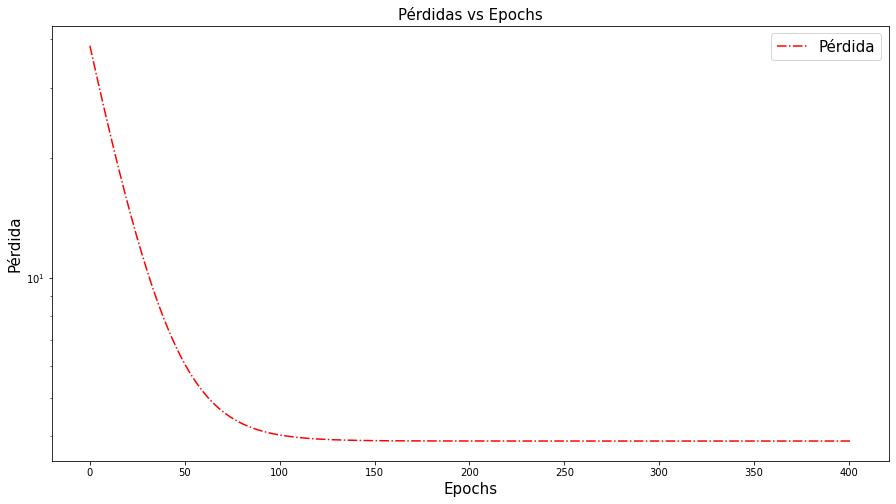

In [15]:
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs+1),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.title("Pérdidas vs Epochs",fontsize=15)
plt.show()

## <span style="color:#4361EE">Aplicando Todo</span>  

In [16]:
def regresion(μ,σ,m,epochs,W1,aprendizaje):
    # Se escoge una semilla
    onp.random.seed(22)

    # Generación de los datos
    x=onp.linspace(-2,2,100)
    y=m*x+2*onp.random.normal(loc=μ,scale=σ,size=len(x))

    data=pd.DataFrame({"Mediciones":x,"Observaciones":y})

    ## Estimación inicial
    W1=W1

    # Acumular resultados
    w1=[]
    train_loss=[]
    # Número de veces que se cambian los parámetros
    epochs=epochs

    # Tasa de Aprendizaje
    h=aprendizaje
    #0.8

    #print("Pérdidas:\n")

    w1.append(W1)
    train_loss.append(loss(W1,x,y))
    #print(f"Condición Inicial: Pérdida: {loss(W1,x,y)}, Parámetro: {W1}\n")

    
    for epoch in range(epochs):

        W1=optimize(W1,x,y,h)

        w1.append(W1)

        losss=loss(W1,x,y)

        train_loss.append(losss)

        #if epoch%100==0:
            #print(f"Iteración {epoch}: Pérdida: {losss}, Parámetro: {W1}")
        
        # Haciendo el modelo

    mod=w1[-1]*x
    
        # eje β (par.)
    β1x=onp.linspace(-11,16,epochs)

    l=onp.empty(len(β1x))

    for i in range(len(l)):
        l[i]=((β1x[i]*x-y)**2).mean()

    plt.figure(figsize=(22,7))
    
    plt.subplot(121)
    plt.plot(x,y,'o')
    plt.plot(x,mod,'r--')
    plt.xlabel("Mediciones",fontsize=15)
    plt.ylabel("Observaciones",fontsize=15)
    plt.legend(["Datos","Modelo"],fontsize=15)
    
    plt.subplot(122)
    plt.suptitle("Estimación de Parámetros",fontsize=20)
    #ax = plt.axes()


    plt.plot(β1x,l,'r--',lw=3) # Función de pérdida

    plt.plot(w1,train_loss,'b--',lw=3,ms=8) # Ruta tomada por el optimizador
    plt.plot(w1[0],train_loss[0],'ko',ms=8) # Condición Inicial
    plt.plot(w1[-1],train_loss[-1],'go',ms=8) # Estado Final

    plt.xlabel(r"$w_1$",fontsize=15)
    plt.ylabel(r"Pérdida",fontsize=15)
    plt.legend(["Función de Pérdida","Descenso del Gradiente","Estado Inicial","Estado Final"],fontsize=13)
    plt.show()
    

interactive_plot = interactive(regresion, σ=(0, 10.), μ=(-3, 3, 0.5),m = (-10.,10.),epochs=(0,500),W1=(-10.,10.),aprendizaje=(0.0001,1.,0.01))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='μ', max=3.0, min=-3.0, step=0.5), FloatSlider(value=…

### <span style="color:#4CC9F0">Ejercicios</span>  

- Hacer un aplicativo que muestre las animaciones de manera fluida.
- Probar otro tipo de simulación de datos que no tengan tendencia lineal.
- ¿Cuáles son los hiperparámetros apropiados para obtener el mejor modelo en menos epochs?